# Part 1 Data Preporcessing

## 1.0 Data Load

In [143]:
# Setting up path

setwd("C:/Udemy Machine Learning/Machine Learning A-Z Template Folder/Part 1 - Data Preprocessing/")

In [144]:
dataset = read.csv('data.csv')


In [13]:
dataset

Country,Age,Salary,Purchased
France,44,72000,No
Spain,27,48000,Yes
Germany,30,54000,No
Spain,38,61000,No
Germany,40,NA,Yes
France,35,58000,Yes
Spain,NA,52000,No
France,48,79000,Yes
Germany,50,83000,No
France,37,67000,Yes


## 2.0 How to fix missing values

In [145]:
# This command is to replace missing values from dataset to its mean for Age Variable.
# If statement to check for Null/NA in Age variable.
# $ sign to identify variable
# ave(x, …, FUN = mean)

dataset$Age = ifelse(is.na(dataset$Age), 
                     ave(dataset$Age, FUN = function(x) mean(x, na.rm = TRUE)), 
                     dataset$Age)

In [146]:
# This command is to replace missing values from dataset to its mean for Salary Variable.
# If statement to check for Null/NA in Age variable.
# $ sign to identify variable
# ave(x, …, FUN = mean)

dataset$Salary = ifelse(is.na(dataset$Salary), 
                        ave(dataset$Salary, FUN = function(x) mean(x, na.rm = TRUE)), 
                        dataset$Salary)

In [148]:
dataset

Country,Age,Salary,Purchased
France,44.00000,72000.00,No
Spain,27.00000,48000.00,Yes
Germany,30.00000,54000.00,No
Spain,38.00000,61000.00,No
Germany,40.00000,63777.78,Yes
France,35.00000,58000.00,Yes
Spain,38.77778,52000.00,No
France,48.00000,79000.00,Yes
Germany,50.00000,83000.00,No
France,37.00000,67000.00,Yes


## 3.0 working with categorical variable

In [149]:
# Encoding categorical data
# We will use factor function and R does not require dummy variable.
# factor(x = character(), levels, labels = levels,
#       exclude = NA, ordered = is.ordered(x), nmax = NA)

dataset$Country = factor(dataset$Country, 
                         levels = c('France','Spain','Germany'),
                         labels = c(1,2,3))

In [18]:
dataset

Country,Age,Salary,Purchased
1,44.00000,72000.00,No
2,27.00000,48000.00,Yes
3,30.00000,54000.00,No
2,38.00000,61000.00,No
3,40.00000,63777.78,Yes
1,35.00000,58000.00,Yes
2,38.77778,52000.00,No
1,48.00000,79000.00,Yes
3,50.00000,83000.00,No
1,37.00000,67000.00,Yes


In [150]:
dataset$Purchased = factor(dataset$Purchased, 
                         levels = c('No','Yes'),
                         labels = c(0,1))

In [20]:
dataset

Country,Age,Salary,Purchased
1,44.00000,72000.00,0
2,27.00000,48000.00,1
3,30.00000,54000.00,0
2,38.00000,61000.00,0
3,40.00000,63777.78,1
1,35.00000,58000.00,1
2,38.77778,52000.00,0
1,48.00000,79000.00,1
3,50.00000,83000.00,0
1,37.00000,67000.00,1


## 4.0 Training and Test Set

In [110]:
#install.packages("caTools", repos = "http://cran.us.r-project.org")

# Contains several basic utility functions including: moving (rolling, running) window statistic functions, 
# read/write for GIF and ENVI binary files, fast calculation of AUC, LogitBoost classifier, base64 encoder/decoder, 
# round-off-error-free sum and cumsum, etc.

In [8]:
library(caTools)

Warning message:
"package 'caTools' was built under R version 3.3.3"

In [21]:
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.8)

In [104]:
split

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE

In [151]:
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [23]:
training_set

,Country,Age,Salary,Purchased
1,1,44.00000,72000.00,0
2,2,27.00000,48000.00,1
3,3,30.00000,54000.00,0
4,2,38.00000,61000.00,0
5,3,40.00000,63777.78,1
7,2,38.77778,52000.00,0
8,1,48.00000,79000.00,1
10,1,37.00000,67000.00,1


In [24]:
test_set

,Country,Age,Salary,Purchased
6,1,35,58000,1
9,3,50,83000,0


## 5.0 Feature Scaling

In [152]:
# factor in R is not Numeric.

training_set[, 2:3] = scale(training_set[, 2:3])
test_set[, 2:3] = scale(test_set[, 2:3])

In [153]:
training_set

,Country,Age,Salary,Purchased
1,1,0.90101716,0.9392746,0
2,2,-1.58847494,-1.3371160,1
3,3,-1.14915281,-0.7680183,0
4,2,0.02237289,-0.1040711,0
5,3,0.31525431,0.1594000,1
7,2,0.13627122,-0.9577176,0
8,1,1.48678000,1.6032218,1
10,1,-0.12406783,0.4650265,1


In [154]:
test_set

,Country,Age,Salary,Purchased
6,1,-0.7071068,-0.7071068,1
9,3,0.7071068,0.7071068,0


# Part2: Multiple Linear Regression

## Step 1: Data Read and Summary

#### California Housing Prices

Median house prices for California districts derived from the 1990 census.
Last Updated: 9 months ago (Version 1)
About this Dataset
Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

Acknowledgements
This data was initially featured in the following paper: Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron. Aurélien Géron wrote: This dataset is a modified version of the California Housing dataset available from: Luís Torgo's page (University of Porto)

In [30]:
setwd("C:/Udemy Machine Learning/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 5 - Multiple Linear Regression/")

In [31]:
housing = read.csv('housing.csv')

In [34]:
# Head will show you first few records to analyze
head(housing)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


In [35]:
#Sumary gives you summary statistics of attributes

summary(housing)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

So from that summary we can see a few things we need to do before actually running algorithms.

- NA's in total_bedrooms need to be addressed. These must be given a value
- We will split the ocean_proximity into binary columns. Most machine learning algorithms in R can handle categoricals in a  single column, but we will cater to the lowest common denominator and do the splitting.
- Make the total_bedrooms and total_rooms into a mean_number_bedrooms and mean_number_rooms columns as there are likely more accurate depections of the houses in a given group.

In [36]:
colnames(housing)

[1] "longitude"          "latitude"           "housing_median_age"
 [4] "total_rooms"        "total_bedrooms"     "population"        
 [7] "households"         "median_income"      "median_house_value"
[10] "ocean_proximity"

In [37]:
#par(mfrow=c(2,5))

In [39]:
library(tidyverse)
library(reshape2)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



Using ocean_proximity as id variables
Warning message:
"Removed 207 rows containing non-finite values (stat_bin)."

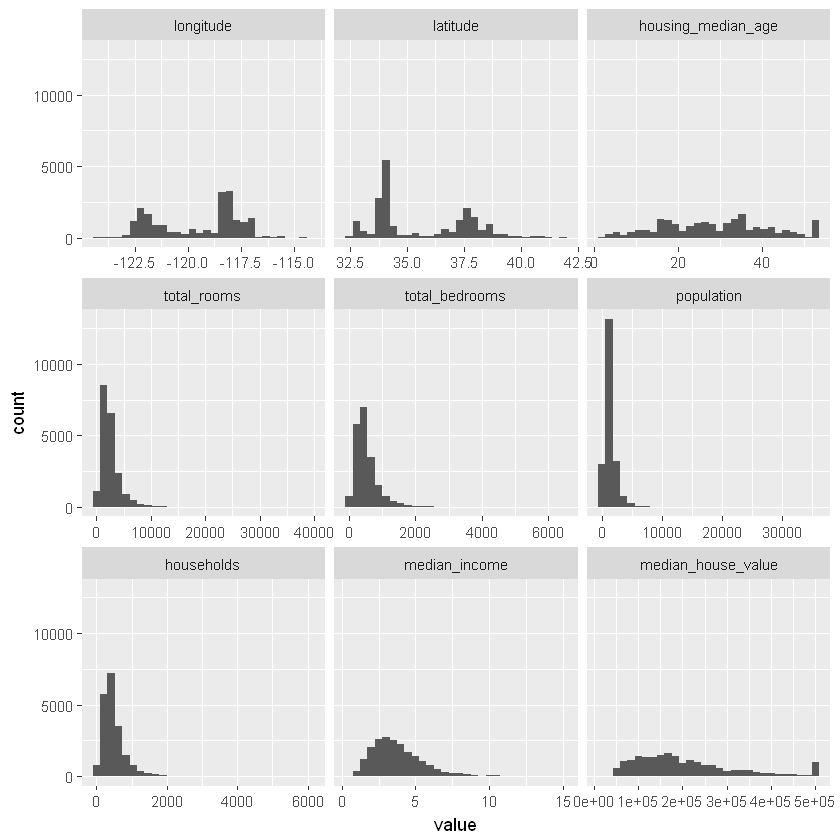

In [40]:
ggplot(data = melt(housing), mapping = aes(x = value)) + 
    geom_histogram(bins = 30) + facet_wrap(~variable, scales = 'free_x')

## Step 2: Clean the data

Impute missing values
Fill median for total_bedrooms which is the only column with missing values. 
The median is used instead of mean because it is less influenced by extreme outliers. 
Note this may not be the best, as these could be actual buildings with no bedrooms (warehouses or something). 
We don't know... but imputation is often the best of a bad job

In [43]:
housing$total_bedrooms[is.na(housing$total_bedrooms)] = median(housing$total_bedrooms , na.rm = TRUE)

Fix the total columns - make them means

it make sense to convert total room and total bedrooms to its mean value.

In [44]:
housing$mean_bedrooms = housing$total_bedrooms/housing$households
housing$mean_rooms = housing$total_rooms/housing$households

drops = c('total_bedrooms', 'total_rooms')

housing = housing[ , !(names(housing) %in% drops)]

In [45]:
head(housing)

longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,mean_bedrooms,mean_rooms
-122.23,37.88,41,322,126,8.3252,452600,NEAR BAY,1.0238095,6.984127
-122.22,37.86,21,2401,1138,8.3014,358500,NEAR BAY,0.9718805,6.238137
-122.24,37.85,52,496,177,7.2574,352100,NEAR BAY,1.0734463,8.288136
-122.25,37.85,52,558,219,5.6431,341300,NEAR BAY,1.0730594,5.817352
-122.25,37.85,52,565,259,3.8462,342200,NEAR BAY,1.0810811,6.281853
-122.25,37.85,52,413,193,4.0368,269700,NEAR BAY,1.1036269,4.761658


#### Turn categoricals into booleans
Below I do the following:

- Get a list of all the categories in the 'ocean_proximity' column
- Make a new empty dataframe of all 0s, where each category is its own colum
- Use a for loop to populate the appropriate columns of the dataframe
- Drop the original column from the dataframe.

This is an example of me coding R with a python accent... I would love comments about how to do this more cleanly in R!

Fun follow up task: can you turn this into a function that could be used to split any categorial column?

In [46]:
categories = unique(housing$ocean_proximity)
#split the categories off
cat_housing = data.frame(ocean_proximity = housing$ocean_proximity)

In [47]:
categories

[1] NEAR BAY   <1H OCEAN  INLAND     NEAR OCEAN ISLAND    
Levels: <1H OCEAN INLAND ISLAND NEAR BAY NEAR OCEAN

In [49]:
for(cat in categories){
    cat_housing[,cat] = rep(0, times= nrow(cat_housing))
}
head(cat_housing) #see the new columns on the right

ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
NEAR BAY,0,0,0,0,0
NEAR BAY,0,0,0,0,0
NEAR BAY,0,0,0,0,0
NEAR BAY,0,0,0,0,0
NEAR BAY,0,0,0,0,0
NEAR BAY,0,0,0,0,0


In [51]:
for(i in 1:length(cat_housing$ocean_proximity)){
    cat = as.character(cat_housing$ocean_proximity[i])
    cat_housing[,cat][i] = 1
}

head(cat_housing)

ocean_proximity,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
NEAR BAY,1,0,0,0,0
NEAR BAY,1,0,0,0,0
NEAR BAY,1,0,0,0,0
NEAR BAY,1,0,0,0,0
NEAR BAY,1,0,0,0,0
NEAR BAY,1,0,0,0,0


In [53]:
cat_columns = names(cat_housing)
keep_columns = cat_columns[cat_columns != 'ocean_proximity']
cat_housing = select(cat_housing,one_of(keep_columns))

tail(cat_housing)

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
20635,0,0,1,0,0
20636,0,0,1,0,0
20637,0,0,1,0,0
20638,0,0,1,0,0
20639,0,0,1,0,0
20640,0,0,1,0,0


#### Scale the numerical variables
Note here I scale every one of the numericals except for 'median_house_value' as this is what we will be working to predict. The x values are scaled so that coefficients in things like support vector machines are given equal weight, but the y value scale doen't affect the learning algorithms in the same way (and we would just need to re-scale the predictions at the end which is another hassle).

In [54]:
drops = c('ocean_proximity','median_house_value')
housing_num =  housing[ , !(names(housing) %in% drops)]

In [58]:
scaled_housing_num = scale(housing_num)


In [60]:
head(scaled_housing_num)

longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442
-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334
-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925
-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623
-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024
-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231


#### Merge the altered numerical and categorical dataframes

In [62]:
# cbind is used to merge two data frames.

cleaned_housing = cbind(cat_housing, scaled_housing_num, median_house_value=housing$median_house_value)

In [63]:
head(cleaned_housing)

NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms,median_house_value
1,0,0,0,0,-1.327803,1.052523,0.9821189,-0.9744050,-0.9770092,2.34470896,-0.148510661,0.6285442,452600
1,0,0,0,0,-1.322812,1.043159,-0.6070042,0.8614180,1.6699206,2.33218146,-0.248535936,0.3270334,358500
1,0,0,0,0,-1.332794,1.038478,1.8561366,-0.8207575,-0.8436165,1.78265622,-0.052900657,1.1555925,352100
1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7660095,-0.7337637,0.93294491,-0.053646030,0.1569623,341300
1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.7598283,-0.6291419,-0.01288068,-0.038194658,0.3447024,342200
1,0,0,0,0,-1.337785,1.038478,1.8561366,-0.8940491,-0.8017678,0.08744452,0.005232996,-0.2697231,269700


## Step 3. Create a test set of data

We pull this subsection from the main dataframe and put it to the side to not be looked at prior to testing our models. Don't look at it, as snooping the test data introduces a bias to your work!

This is the data we use to validate our model, when we train a machine learning algorithm the goal is usually to make an algorithm that predicts well on data it hasn't seen before. To assess this feature, we pull a set of data to validate the models as accurate/inaccurate once we have completed the training proces

In [64]:
set.seed(1738) # Set a random seed so that same sample can be reproduced in future runs

sample = sample.int(n = nrow(cleaned_housing), size = floor(.8 * nrow(cleaned_housing)), replace = F)
train = cleaned_housing[sample, ] #just the samples
test  = cleaned_housing[-sample, ] #everything but the samples

In [66]:
nrow(test)

[1] 4128

In [67]:
nrow(train)

[1] 16512

## Step 4. Test some predictive models.
We start here with just a simple linear model using 3 of the avaliable predictors. Median income, total rooms and population. This serves as an entry point to introduce the topic of cross validation and a basic model. We want a model that makes good predictions on data that it has not seen before. A model that explains the variation in the data it was trained on well, but does not generalize to external data is referred to as being overfit. You may thin "that's why we split off some test data!" but we don't want to repeatedly assess against our test set, as then the model can just become overfit to that set of data thus moving and not solving the problem.

So here we do cross validation to test the model using the training data itself. Our K is 5, what this means is that the training data is split into 5 equal portions. One of the 5 folds is put to the side (as a mini test data set) and then the model is trained using the other 4 portions. After that the predictions are made on the folds that was withheld, and the process is repeated for each of the 5 folds and the average predictions produced from the iterations of the model is taken. This gives us a rough understanding of how well the model predicts on external data!

In [68]:
library('boot')

In [73]:
?cv.glm # note the K option for K fold cross validation

In [134]:
# explain proc GLM and Cross Validation and Kfold.

glm_house = glm(median_house_value~median_income+mean_bedrooms+longitude+latitude+housing_median_age , data=cleaned_housing)
k_fold_cv_error = cv.glm(cleaned_housing , glm_house, K=5)

In [135]:
k_fold_cv_error$delta

[1] 5400637835 5396063165

The first component is the raw cross-validation estimate of prediction error. The second component is the adjusted cross-validation estimate.

In [140]:
glm_cv_rmse = sqrt(k_fold_cv_error$delta)[2]
glm_cv_rmse #off by about $73457... it is a start

[1] 73457.9

In [138]:
names(glm_house) #what parts of the model are callable?

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [139]:
glm_house$coefficients

(Intercept)      median_income      mean_bedrooms          longitude 
        206855.817          71932.872           6605.595         -93633.524 
          latitude housing_median_age 
        -98041.219          12112.747

Since we scaled the imputs we can say that of the three we looked at, median income had the biggest effect on housing price... but I'm always very careful and google lots before intrepreting coefficients!

In [88]:
colnames(cleaned_housing)

[1] "NEAR BAY"           "<1H OCEAN"          "INLAND"            
 [4] "NEAR OCEAN"         "ISLAND"             "longitude"         
 [7] "latitude"           "housing_median_age" "population"        
[10] "households"         "median_income"      "mean_bedrooms"     
[13] "mean_rooms"         "median_house_value"

#### Random forest model

In [89]:
library('randomForest')

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [90]:
?randomForest

In [91]:
names(train)

[1] "NEAR BAY"           "<1H OCEAN"          "INLAND"            
 [4] "NEAR OCEAN"         "ISLAND"             "longitude"         
 [7] "latitude"           "housing_median_age" "population"        
[10] "households"         "median_income"      "mean_bedrooms"     
[13] "mean_rooms"         "median_house_value"

In [92]:
set.seed(1738)

train_y = train[,'median_house_value']
train_x = train[, names(train) !='median_house_value']

head(train_y)
head(train_x)

[1] 112500  65600 399200  47500  32500 200000

,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,longitude,latitude,housing_median_age,population,households,median_income,mean_bedrooms,mean_rooms
4975,0,1,0,0,0,0.6437155,-0.7639971,1.0615750,-0.4728430,-0.6605285,-1.36479701,0.09416648,-0.79519952
13918,0,0,1,0,0,1.7567501,-0.7078161,-0.7659165,-1.1262865,-1.1600972,-0.39249525,0.11519417,-0.02182537
9020,0,0,0,1,0,0.3941562,-0.6890891,-1.5604781,10.1085264,8.9751328,2.18074620,-0.11499230,0.93189653
2900,0,0,1,0,0,0.2793589,-0.1225970,0.5053819,-0.8375351,-1.1993304,-1.03071303,-0.47625410,-1.01131583
2764,0,0,1,0,0,1.8416002,-1.2649446,-1.0837411,-1.2137066,-1.2542568,0.07902268,2.59860572,2.00915618
5786,0,1,0,0,0,0.6586891,-0.6890891,-1.1631973,0.2256351,1.0604990,0.01828013,-0.10923682,-0.54183837


In [93]:
rf_model = randomForest(train_x, y = train_y , ntree = 500, importance = TRUE)

In [94]:
names(rf_model) #these are all the different things you can call from the model.

[1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"

In [95]:
rf_model$importance

,%IncMSE,IncNodePurity
NEAR BAY,471570753,1.386134e+12
<1H OCEAN,1589525273,3.934732e+12
INLAND,4041972795,3.010652e+13
NEAR OCEAN,505892227,2.133809e+12
ISLAND,1608344,6.900350e+10
longitude,6800888175,2.573286e+13
latitude,5404868569,2.224088e+13
housing_median_age,1101454757,9.896973e+12
population,1049908169,7.480374e+12
households,1156877777,7.922140e+12


Percentage included mean squared error is a measure of feature importance. It is defined as the measure of the increase in mean squared error of predictions when the given variable is shuffled, thereby acting as a metric of that given variable’s importance in the performance of the model. So higher number == more important predictor.

In [101]:
oob_prediction = predict(rf_model) #

In [102]:
#you may have noticed that this is avaliable using the $mse in the model options.
#but this way we learn stuff!
train_mse = mean(as.numeric((oob_prediction - train_y)^2))
oob_rmse = sqrt(train_mse)
oob_rmse

[1] 48976.25

So even using a random forest of only 1000 decision trees we are able to predict the median price of a house in a given district to within $49,000 of the actual median house price. This can serve as our bechmark moving forward and trying other models.

How well does the model predict on the test data?

In [103]:
test_y = test[,'median_house_value']
test_x = test[, names(test) !='median_house_value']


y_pred = predict(rf_model , test_x)
test_mse = mean(((y_pred - test_y)^2))
test_rmse = sqrt(test_mse)
test_rmse

[1] 48354.9

Well that looks great! Our model scored roughly the same on the training and testing data, suggesting that it is not overfit and that it makes good predictions.